In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
path = './instances/C108.txt'

In [3]:
solution = """0 0.0 1 830 4 923.0 3 1015.0 5 1106.0 0 1211.1327459504216
0 0.0 10 279 11 372.0 9 465.1622776601684 14 577.0939898596298 19 675.6963151266724 23 793.8743207338831 20 889.2594855410176 0 989.2594855410176
0 0.0 24 15 27 179 26 502 30 597.0 29 692.0 36 797.8113883008419 35 897.8113883008419 40 1018.225200952333 0 1128.8407290804214
0 0.0 43 16.55294535724685 41 110.15849663271084 44 278 45 453 48 545.0 50 719 49 867 47 959.0 0 1067.02775637732
0 0.0 51 635 52 825 59 938.8537208837531 55 1032.853720883753 0 1157.9108171696694
0 0.0 61 412 64 539 68 669 69 836 66 928.0 65 1023.0990195135928 67 1114.0990195135928 0 1216.3055751293266
0 0.0 72 367 76 494.33630940518896 73 589.7214742123235 77 683.7214742123235 79 774.7214742123235 80 870.106639019458 83 992.8022044680017 86 1088.8022044680017 0 1205.2786090577492
0 0.0 90 20.615528128088304 89 640 91 756 94 868.5610283453569 96 963.9461931524914 0 1090.0017059071315
0 0.0 99 628 12 748.4138126514911 8 859.8147472105238 6 952.0508151880236 7 1045.0508151880235 0 1151.0508151880235
0 0.0 17 33.301651610693426 18 126.30165161069343 28 476 25 569.605551275464 22 704 21 836 0 936.1980390271856
0 0.0 31 144 37 305 39 481 34 655 53 798.8144961882948 42 917.9692556625213 0 1027.2824635783493
0 0.0 62 181 60 463 78 613.9015599143404 71 710.9015599143404 75 859.2110788627934 0 965.0224671636354
0 0.0 87 25.495097567963924 84 360 82 455.8309518948453 92 576.8793012873655 100 678.8793012873655 98 779.319607796276 2 883.2479960734602 13 996.7852006653399 0 1117.5910442668385
0 0.0 32 31.622776601683793 38 414 46 535.0483493925201 58 653.2086050731775 56 745.2086050731775 70 895.6238349411503 0 1044.1473344947485
0 0.0 15 318 97 470 95 565.3851648071345 88 675.6089132232912 85 768.6089132232912 81 888.8413461389532 0 1026.275511041479
0 0.0 16 394 93 529.0 54 697.4474346298207 57 792.8325994369552 33 923.4404804454491 0 1046.9665896739295
0 0.0 63 100 74 263 0 372.8494332412792""".split('\n')

In [4]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [5]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [6]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))
for route in solution:
    G.add_path(list(map(int, route.split()[::2])))

In [7]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

c:\users\gzhigalov\documents\programs\miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


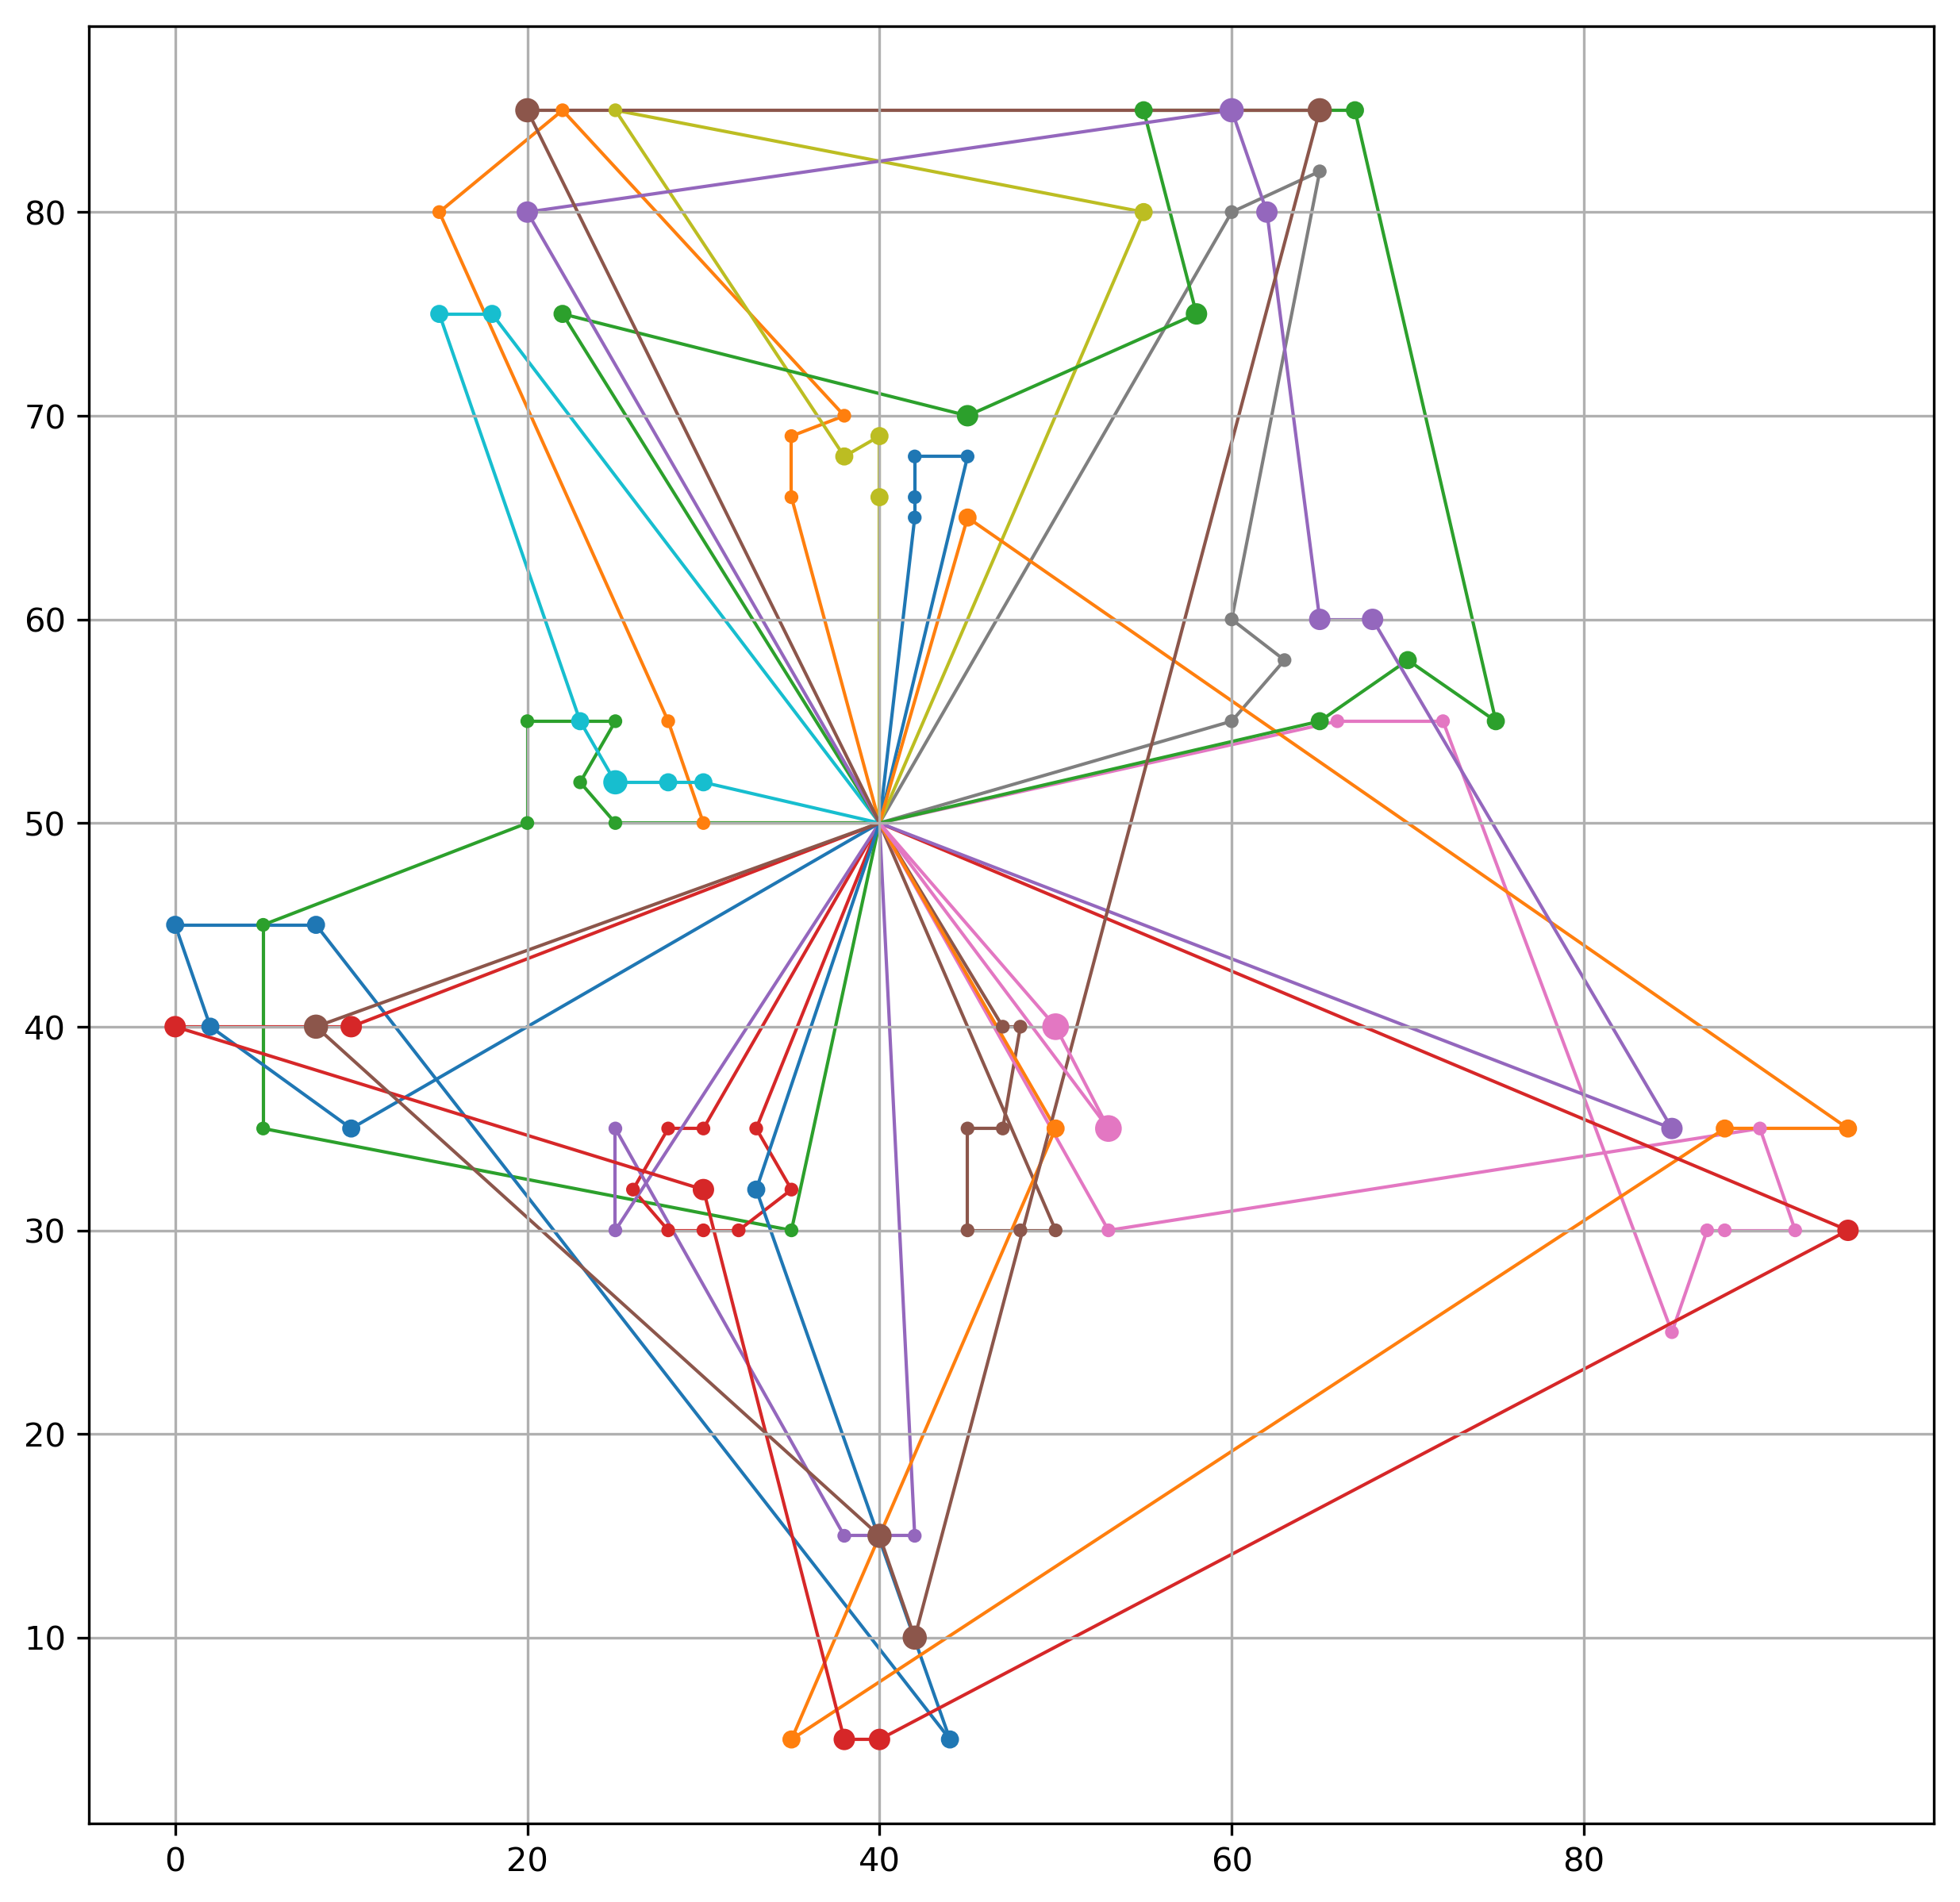

In [8]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)
# pos = nx.spring_layout(G)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.grid()

# nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax)
for path in paths:
    # print(path)
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    
    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
plt.savefig("solution1.png", dpi=300)